In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [58]:
class MultivariateRegression:
    def __init__(self, lrate=0.0000001, n_iter=50):
        self.lrate = lrate
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        self.theta = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            error = self.predict(X) - Y
            t = self.lrate/X.shape[0]
            self.theta[1:] -= t * np.dot(error,X)
            self.theta[0] -= t * error.sum()
            cost = (error**2).sum() / (2.0*len(Y))
            self.cost_.append(cost)
                
    def predict(self, X):
        return np.dot(X,self.theta[1:]) + self.theta[0]

In [59]:
df = pd.read_csv("Sacramentorealestatetransactions.csv")
df = df[df.sq__ft != 0] 
sample_df = df[["sq__ft","beds","baths","price"]].sample(n=100)

In [60]:
sample_df.head()

,sq__ft,beds,baths,price
454,1798,4,2,238861
640,1132,2,2,145000
781,2592,5,3,303000
103,975,3,1,271742
381,1139,2,1,133105


In [61]:
sample_df.describe()

,sq__ft,beds,baths,price
count,100.000000,100.000000,100.000000,100.000000
mean,1444.370000,3.200000,1.880000,203745.160000
std,443.502944,0.816497,0.607695,75518.273491
min,722.000000,1.000000,1.000000,61000.000000
25%,1114.500000,3.000000,2.000000,143750.000000
50%,1352.500000,3.000000,2.000000,198000.000000
75%,1702.500000,4.000000,2.000000,250033.500000
max,2592.000000,5.000000,4.000000,415000.000000


In [70]:
X = np.array(sample_df[["sq__ft","beds","baths"]])
Y = np.array(sample_df["price"])

In [136]:
regressor = MultivariateRegression(lrate=0.0000008,n_iter = 800)
regressor.fit(X,Y)

In [137]:
regressor.theta

array([   2.74903499,  138.18448737,   -0.39147731,   -2.38568435])

In [138]:
y_regress = []
for i in X:
    t = regressor.predict(i)
    y_regress.append(t)

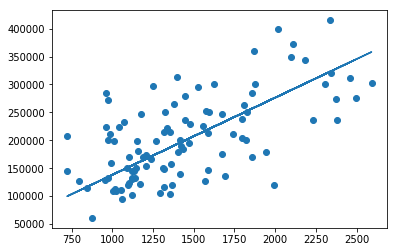

In [139]:
plt.scatter(X[:,0],Y)
plt.plot(X[:,0],y_regress)
plt.show()

In [140]:
Y[0:10]

array([238861, 145000, 303000, 271742, 133105, 236685, 115000, 236000,
       300000, 150000])

In [141]:
y_regress[0:10]

[248452.12004230212,
 156422.03441072622,
 358167.82584976387,
 134729.06410120765,
 157391.71150664272,
 308836.35533717641,
 116904.04818552056,
 329146.69781841827,
 318785.63842757494,
 150894.26343875524]

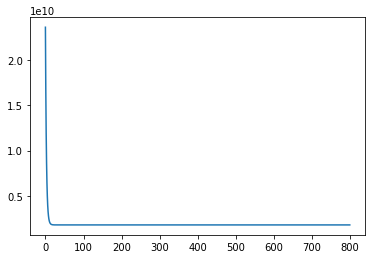

In [142]:
plt.plot(np.array(range(800)),regressor.cost_)